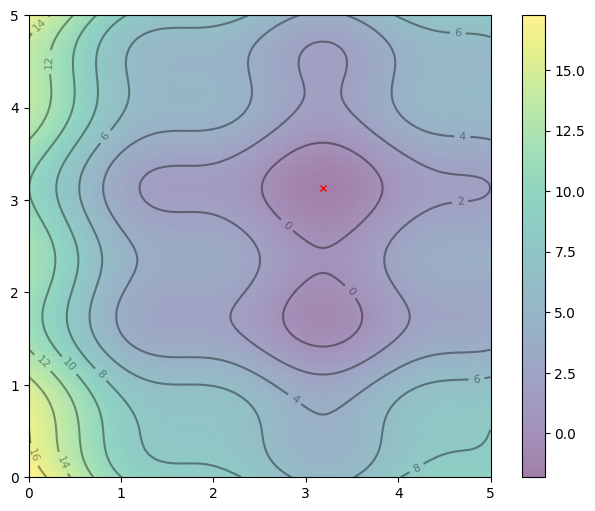

In [22]:
import numpy as np
import matplotlib.pyplot as plt

def f(x,y):
    "Objective function"
    return (x-3.14)**2 + (y-2.72)**2 + np.sin(3*x+1.41) + np.sin(4*y-1.73)

# Contour plot: With the global minimum showed as "X" on the plot
x, y = np.array(np.meshgrid(np.linspace(0,5,100), np.linspace(0,5,100)))
z = f(x, y)
x_min = x.ravel()[z.argmin()]
y_min = y.ravel()[z.argmin()]

plt.figure(figsize=(8,6))
plt.imshow(z, extent=[0, 5, 0, 5], origin='lower', cmap='viridis', alpha=0.5)
plt.colorbar()
plt.plot([x_min], [y_min], marker='x', markersize=5, color="red")
contours = plt.contour(x, y, z, 10, colors='black', alpha=0.4)
plt.clabel(contours, inline=True, fontsize=8, fmt="%.0f")
plt.show()

In [5]:
import numpy as np
np.sin(3.1416/6)

0.5000010603626028

In [6]:
np.array(np.meshgrid(np.linspace(0,5,100)))

array([[0.        , 0.05050505, 0.1010101 , 0.15151515, 0.2020202 ,
        0.25252525, 0.3030303 , 0.35353535, 0.4040404 , 0.45454545,
        0.50505051, 0.55555556, 0.60606061, 0.65656566, 0.70707071,
        0.75757576, 0.80808081, 0.85858586, 0.90909091, 0.95959596,
        1.01010101, 1.06060606, 1.11111111, 1.16161616, 1.21212121,
        1.26262626, 1.31313131, 1.36363636, 1.41414141, 1.46464646,
        1.51515152, 1.56565657, 1.61616162, 1.66666667, 1.71717172,
        1.76767677, 1.81818182, 1.86868687, 1.91919192, 1.96969697,
        2.02020202, 2.07070707, 2.12121212, 2.17171717, 2.22222222,
        2.27272727, 2.32323232, 2.37373737, 2.42424242, 2.47474747,
        2.52525253, 2.57575758, 2.62626263, 2.67676768, 2.72727273,
        2.77777778, 2.82828283, 2.87878788, 2.92929293, 2.97979798,
        3.03030303, 3.08080808, 3.13131313, 3.18181818, 3.23232323,
        3.28282828, 3.33333333, 3.38383838, 3.43434343, 3.48484848,
        3.53535354, 3.58585859, 3.63636364, 3.68

In [28]:
n_particles = 20
X = np.random.rand(2, n_particles) * 5
V = np.random.randn(2, n_particles) * 0.1

In [31]:
np.random.rand(2,4)

array([[0.16279363, 0.33586887, 0.79123425, 0.57825548],
       [0.83639379, 0.17471311, 0.70159719, 0.03186334]])

In [32]:
pbest = X
pbest_obj = f(X[0], X[1])
gbest = pbest[:, pbest_obj.argmin()]
gbest_obj = pbest_obj.min()

In [42]:
gbest

array([3.20900442, 3.09103396])

In [55]:
gbest.reshape(-2,2)-X

array([[3.20900442],
       [3.09103396]])

array([[ 0.00475127,  0.11480742, -0.03144381, -0.03159975, -0.07161571,
         0.1561042 ,  0.03940344, -0.11790477,  0.07776277,  0.0818032 ,
        -0.09140922, -0.01323683, -0.03074229,  0.16767992,  0.10553687,
        -0.00873678, -0.04815483, -0.09733322,  0.0657769 ,  0.02798983],
       [ 0.15925081, -0.02898539, -0.0243843 ,  0.04060215, -0.01041004,
         0.06842777,  0.04698292, -0.05462055, -0.02726731, -0.03766874,
         0.08526229,  0.00754655, -0.09392996,  0.08142893,  0.09379281,
        -0.03656589,  0.12711955, -0.00776325,  0.07517778, -0.0688197 ]])

In [57]:
c1 = c2 = 0.1
w = 0.8
# One iteration
r = np.random.rand(2)
V = w * V + c1*r[0]*(pbest - X) + c2*r[1]*(gbest.reshape(-1,1)-X)
X = X + V
obj = f(X[0], X[1])
pbest[:, (pbest_obj >= obj)] = X[:, (pbest_obj >= obj)]
pbest_obj = np.array([pbest_obj, obj]).max(axis=0)
gbest = pbest[:, pbest_obj.argmin()]
gbest_obj = pbest_obj.min()

In [58]:
pbest

array([[4.30651747, 3.83246436, 3.20900442, 0.29535521, 2.51677354,
        0.71541411, 2.43107054, 0.56779898, 1.49665943, 0.7391935 ,
        1.22775793, 3.87017126, 0.91947174, 1.51584662, 3.16733481,
        1.28093673, 4.69397024, 2.96984494, 3.85045833, 0.38683156],
       [3.93788441, 1.91224887, 3.09103396, 2.43997874, 0.64070806,
        1.78205045, 2.65956368, 3.85903607, 1.40963656, 4.22818419,
        2.4807998 , 0.92149006, 3.71441946, 3.80148369, 3.97975274,
        4.74962152, 4.35371594, 3.3447528 , 3.86402254, 1.75119705]])

MovieWriter imagemagick unavailable; using Pillow instead.


PSO found best solution at f([3.18541756 3.12972478])=-1.8083516042208303
Global optimal at f([3.1818181818181817, 3.131313131313131])=-1.8082706615747688


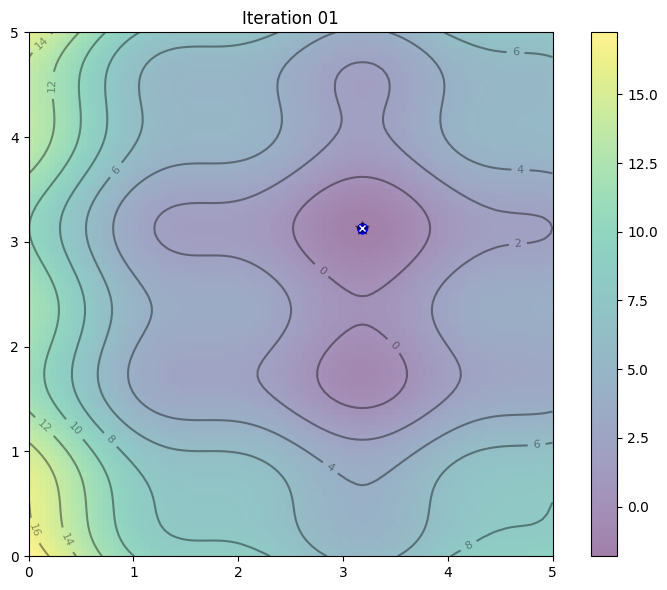

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
 
def f(x,y):
    "Objective function"
    return (x-3.14)**2 + (y-2.72)**2 + np.sin(3*x+1.41) + np.sin(4*y-1.73)
    
# Compute and plot the function in 3D within [0,5]x[0,5]
x, y = np.array(np.meshgrid(np.linspace(0,5,100), np.linspace(0,5,100)))
z = f(x, y)
 
# Find the global minimum
x_min = x.ravel()[z.argmin()]
y_min = y.ravel()[z.argmin()]
 
# Hyper-parameter of the algorithm
c1 = c2 = 0.1
w = 0.8
 
# Create particles
n_particles = 20
np.random.seed(100)
X = np.random.rand(2, n_particles) * 5
V = np.random.randn(2, n_particles) * 0.1
 
# Initialize data
pbest = X
pbest_obj = f(X[0], X[1])
gbest = pbest[:, pbest_obj.argmin()]
gbest_obj = pbest_obj.min()
 
def update():
    "Function to do one iteration of particle swarm optimization"
    global V, X, pbest, pbest_obj, gbest, gbest_obj
    # Update params
    r1, r2 = np.random.rand(2)
    V = w * V + c1*r1*(pbest - X) + c2*r2*(gbest.reshape(-1,1)-X)
    X = X + V
    obj = f(X[0], X[1])
    pbest[:, (pbest_obj >= obj)] = X[:, (pbest_obj >= obj)]
    pbest_obj = np.array([pbest_obj, obj]).min(axis=0)
    gbest = pbest[:, pbest_obj.argmin()]
    gbest_obj = pbest_obj.min()
 
# Set up base figure: The contour map
fig, ax = plt.subplots(figsize=(8,6))
fig.set_tight_layout(True)
img = ax.imshow(z, extent=[0, 5, 0, 5], origin='lower', cmap='viridis', alpha=0.5)
fig.colorbar(img, ax=ax)
ax.plot([x_min], [y_min], marker='x', markersize=5, color="white")
contours = ax.contour(x, y, z, 10, colors='black', alpha=0.4)
ax.clabel(contours, inline=True, fontsize=8, fmt="%.0f")
pbest_plot = ax.scatter(pbest[0], pbest[1], marker='o', color='black', alpha=0.5)
p_plot = ax.scatter(X[0], X[1], marker='o', color='blue', alpha=0.5)
p_arrow = ax.quiver(X[0], X[1], V[0], V[1], color='blue', width=0.005, angles='xy', scale_units='xy', scale=1)
gbest_plot = plt.scatter([gbest[0]], [gbest[1]], marker='*', s=100, color='black', alpha=0.4)
ax.set_xlim([0,5])
ax.set_ylim([0,5])
 
def animate(i):
    "Steps of PSO: algorithm update and show in plot"
    title = 'Iteration {:02d}'.format(i)
    # Update params
    update()
    # Set picture
    ax.set_title(title)
    pbest_plot.set_offsets(pbest.T)
    p_plot.set_offsets(X.T)
    p_arrow.set_offsets(X.T)
    p_arrow.set_UVC(V[0], V[1])
    gbest_plot.set_offsets(gbest.reshape(1,-1))
    return ax, pbest_plot, p_plot, p_arrow, gbest_plot
 
anim = FuncAnimation(fig, animate, frames=list(range(1,50)), interval=500, blit=False, repeat=True)
anim.save("PSO.gif", dpi=120, writer="imagemagick")
 
print("PSO found best solution at f({})={}".format(gbest, gbest_obj))
print("Global optimal at f({})={}".format([x_min,y_min], f(x_min,y_min)))

In [62]:
pip install imagemagick

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement imagemagick (from versions: none)
ERROR: No matching distribution found for imagemagick
